# Importing the required libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
%matplotlib inline
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import  train_test_split, cross_val_score
#from sklearn.feature_selection import SelectKBest
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#from sklearn.svm import LinearSVC , SVC

from sklearn.ensemble import  RandomForestClassifier , GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore") 

# Data Collection:

In [2]:
census_data = pd.read_csv("census_income.csv")

In [3]:
census_data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# What are the columns?

In [4]:
census_data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

# Size of the data:

In [5]:
census_data.shape

(32560, 15)

In [6]:
# Observation: here we can see that the data consists of 32,560 rows and 15 columns.

# What are the different datatypes present?

In [7]:
census_data.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [8]:
# Observation: here we can see that the data has "int" and "object" datatypes.

# Information of the data:

In [9]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
# Observation: Here we can see that hthere are "no nullvalues" present in the data.

# Checking the null values in the data:

In [11]:
census_data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [12]:
census_data.isnull().sum().sum()

0

In [13]:
# Observation: Here we can see that obsolutely the data has no null - values.

# Finding the missing values if any:

In [14]:
census_data.isnull().values.any()

False

In [15]:
# observation: We can observe that there are no missing values present.

# Statistical Information of the data:

In [16]:
census_data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [17]:
# Observation: 1) Here we can see that only few columns which have appeared with the statistical information this is because 
# all these are numerical columns and the rest which are not appeared are the non-numerical columns.

# Lets check the information about the categorical data:

In [18]:
census_data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [19]:
census_data.value_counts(['Workclass'])

Workclass        
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
dtype: int64

In [20]:
census_data.value_counts(['Education'])

Education    
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
dtype: int64

In [21]:
census_data.value_counts(['Marital_status'])

Marital_status        
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
dtype: int64

In [22]:
census_data.value_counts(['Occupation'])

Occupation        
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
dtype: int64

In [23]:
census_data.value_counts(['Relationship'])

Relationship   
 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
dtype: int64

In [24]:
census_data.value_counts(['Race'])

Race               
 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
dtype: int64

In [25]:
census_data.value_counts(['Sex'])

Sex    
 Male      21789
 Female    10771
dtype: int64

In [26]:
census_data.value_counts(['Native_country'])

Native_country             
 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru     

In [27]:
census_data.value_counts(['Income'])

Income
 <=50K    24719
 >50K      7841
dtype: int64

# Using For-loop to find the unique values in all the columns:

In [28]:
for i in census_data.columns:
    print (i,':',len(census_data[i].unique()))

Age : 73
Workclass : 9
Fnlwgt : 21647
Education : 16
Education_num : 16
Marital_status : 7
Occupation : 15
Relationship : 6
Race : 5
Sex : 2
Capital_gain : 119
Capital_loss : 92
Hours_per_week : 94
Native_country : 42
Income : 2


In [29]:
# Observation: Here we can see that the columns have few unique data and the rest records are with these repeated values,so this
# states that our data has duplicates.

# Dropping the duplicates:

In [30]:
census_data=census_data.drop_duplicates()

In [31]:
census_data.shape

(32536, 15)

# Checking whether we have any other data apart from"Nan":

In [32]:
census_data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [33]:
census_data['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [34]:
# Observation: Here we can see that we have the data as "?" which is of no use in our prediction and the other columns might also have
# have this data and so we will drop this data.

## Now we will replace the data "?" with "nan" and then we will drop:

In [35]:
census_data[census_data == ' ?'] = np.nan

In [36]:
census_data.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     582
Income               0
dtype: int64

In [37]:
# Observation: Here we can see that our data is replace with "nan" instead of "?" and now we will drop "NAN"

In [38]:
census_data=census_data.dropna()

In [39]:
census_data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [40]:
# Observation: Here we can see that we have dropped our "nan" values and so we can proceed.

## Checking our data shape now:

In [41]:
census_data.shape

(30138, 15)

In [42]:
# Observation: Here we can see that our data is reduced which we can see in number of "records".

# Checking the null values by plotting the heatmap:

<AxesSubplot:>

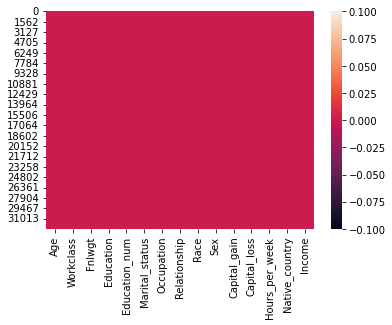

In [43]:
sns.heatmap(census_data.isnull())

In [44]:
# Observation: Here we can see that our graph shows no null values.

# Visualization:

## Univariate Analysis:

In [45]:
census_data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

# Age:

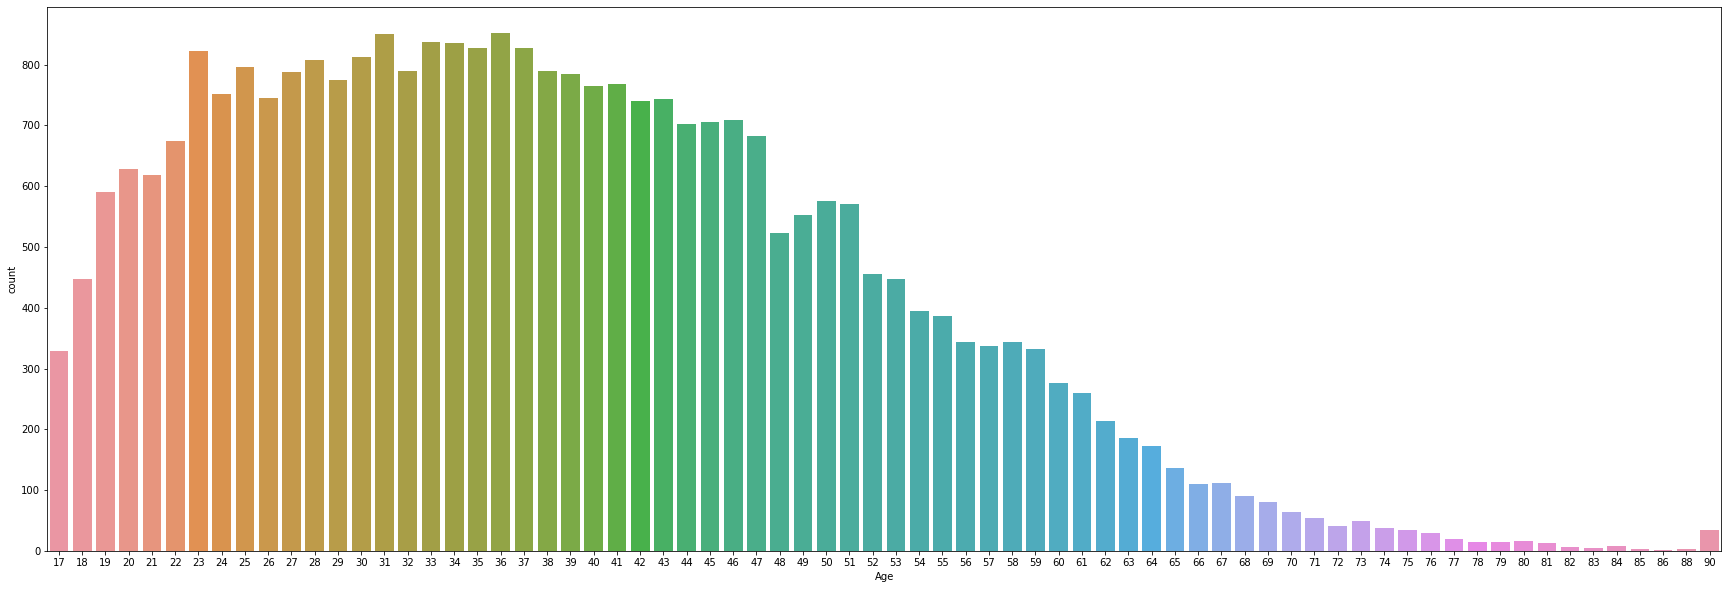

In [46]:
plt.figure(figsize=(30,10))
sns.countplot(census_data.Age);

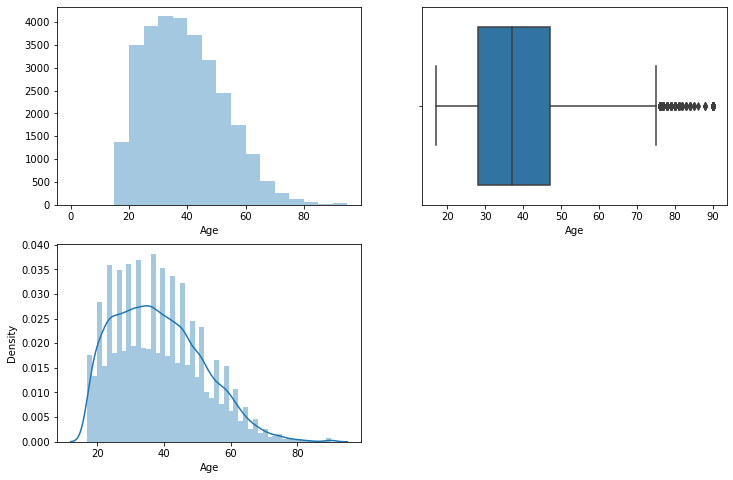

In [47]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(census_data['Age'], kde=False, bins=range(0, 100, 5));
plt.subplot(2,2,2)
sns.boxplot(census_data['Age']);
plt.subplot(2,2,3)
sns.distplot(census_data['Age']);

In [48]:
# Observation: here we can see that our boxplot has the outliers and the distribution curve is skewed somewhat and also the 
# count is more in the ages of 31 and 36

# Workclass:

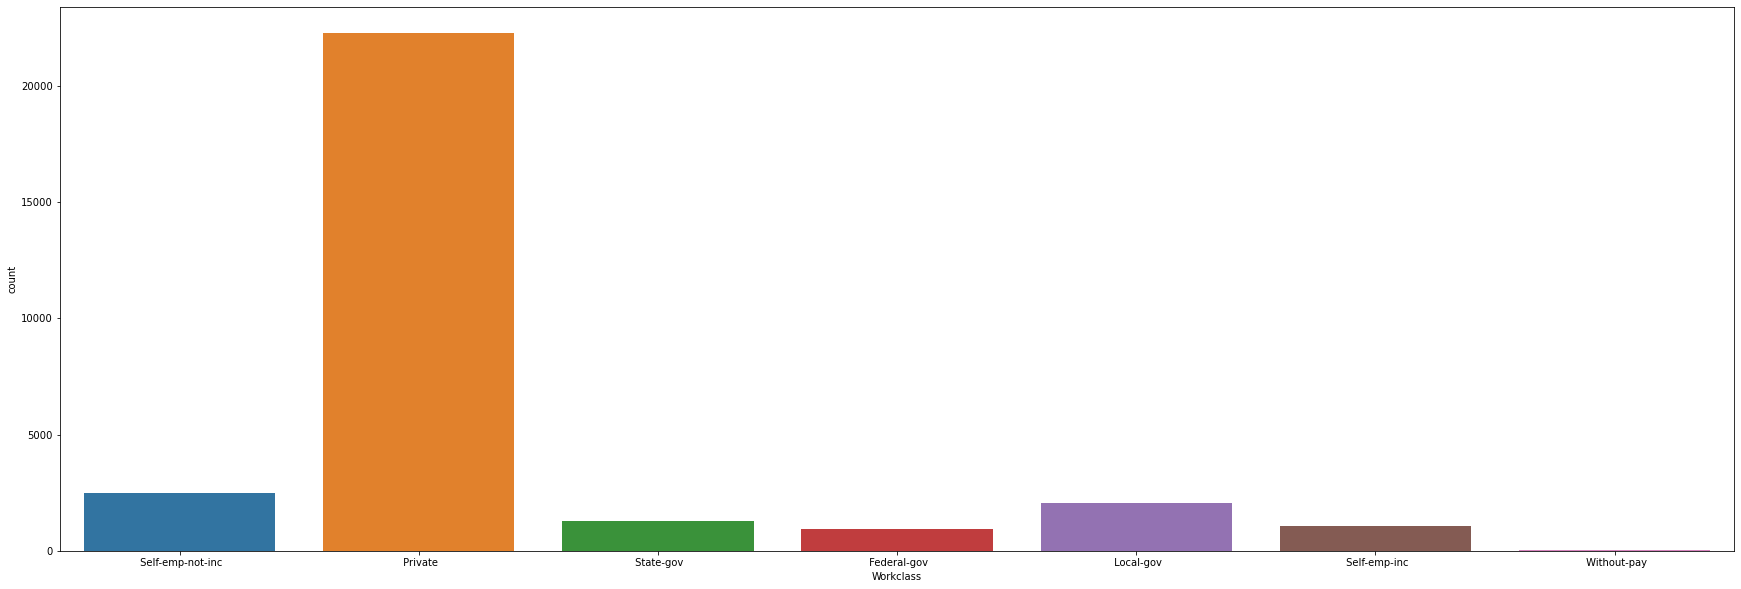

In [49]:
# Workclass:
plt.figure(figsize=(30,10))
sns.countplot(census_data.Workclass);

In [50]:
# Observation: Here we can see that the count is more in the "Private". and the lease is in "without pay".

# Fnlwgt:

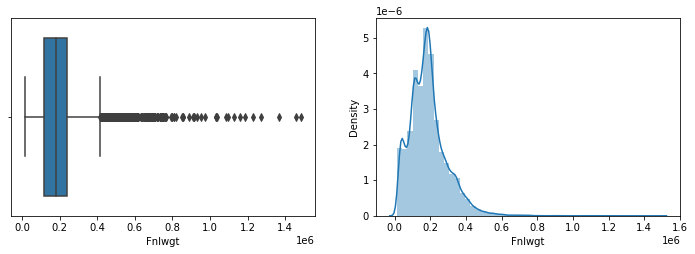

In [51]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.boxplot(census_data['Fnlwgt']);
plt.subplot(2,2,2)
sns.distplot(census_data['Fnlwgt']);

In [52]:
# Observation: here we can see that there are outliers in the boxplot and the distribution curve is not at all normal.

# Education:

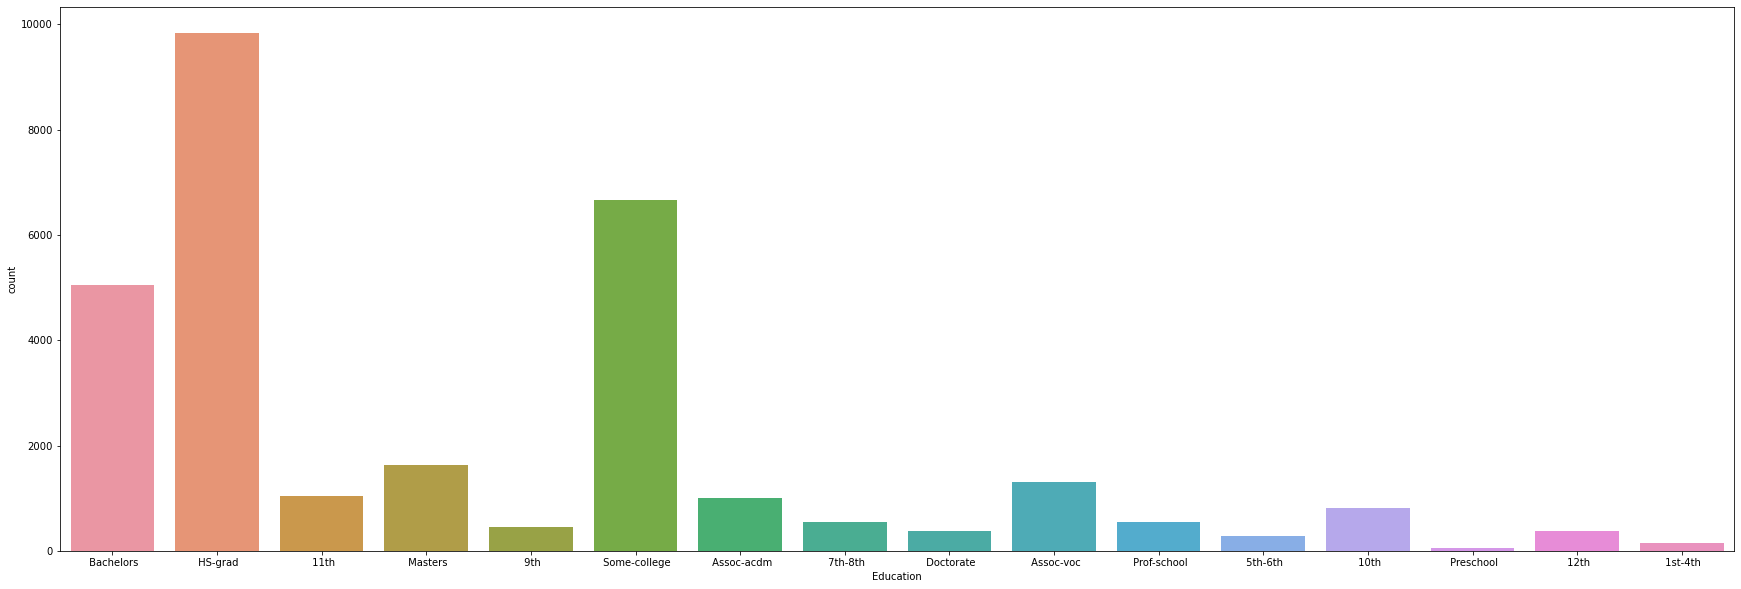

In [53]:
plt.figure(figsize=(30,10))
sns.countplot(census_data.Education);

In [54]:
# Observation: Here we can see that the category "HS - grad" is highest in count and the least count we can see in the category
# "Preschool".

# Education_num:

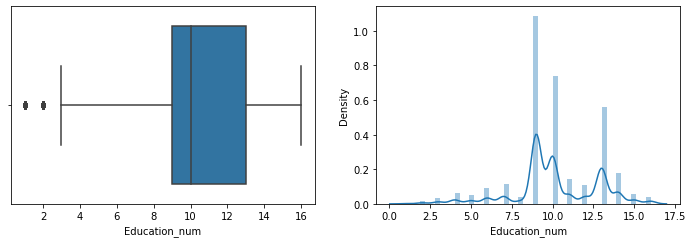

In [55]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.boxplot(census_data['Education_num']);
plt.subplot(2,2,2)
sns.distplot(census_data['Education_num']);

In [56]:
# Observation: Here we can see that the boxplot has the outliers but they are far away from "max -quantile" and probably these
# dont affect our model much and the distribution curve as you see is not at all normal.

# Marital_status:

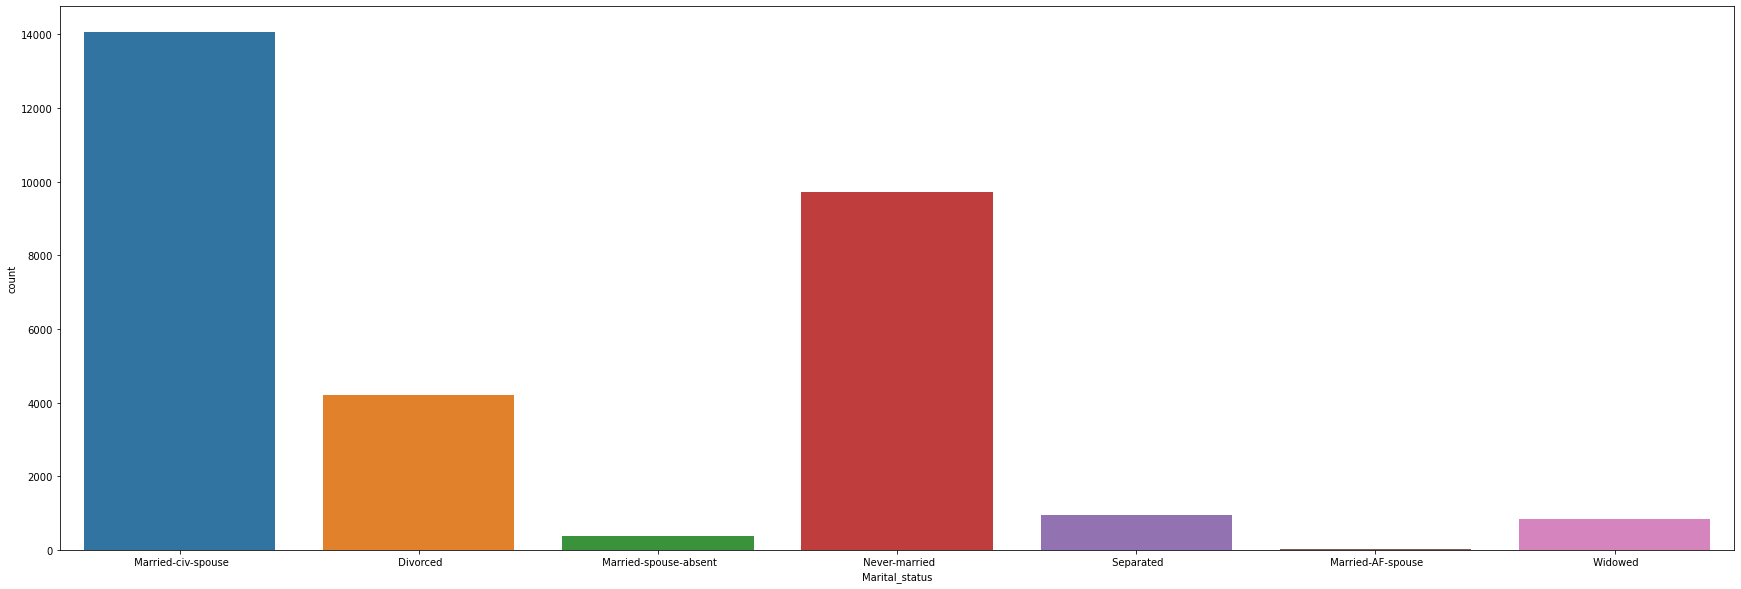

In [57]:
plt.figure(figsize=(30,10))
sns.countplot(census_data.Marital_status);

In [58]:
# Observation: here we can see that the category "Married civ spouse" and the least count is for the category "Married AF spouse".

# Occupation:

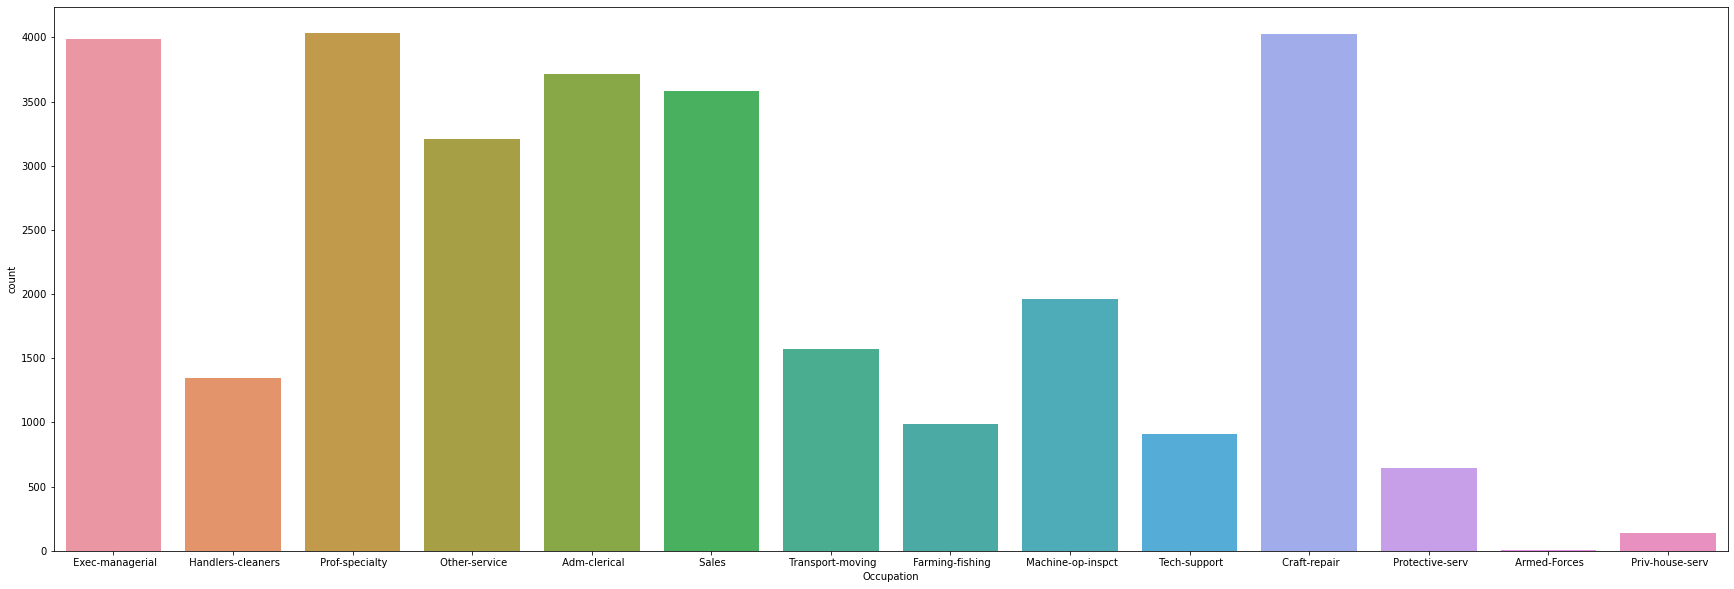

In [59]:
plt.figure(figsize=(30,10))
sns.countplot(census_data.Occupation);

In [60]:
# Observation: Here we can see that the categories "prof-speciality" and "craft-repair" and the least count is for the category
# "Armed Forces".

# Relationship:

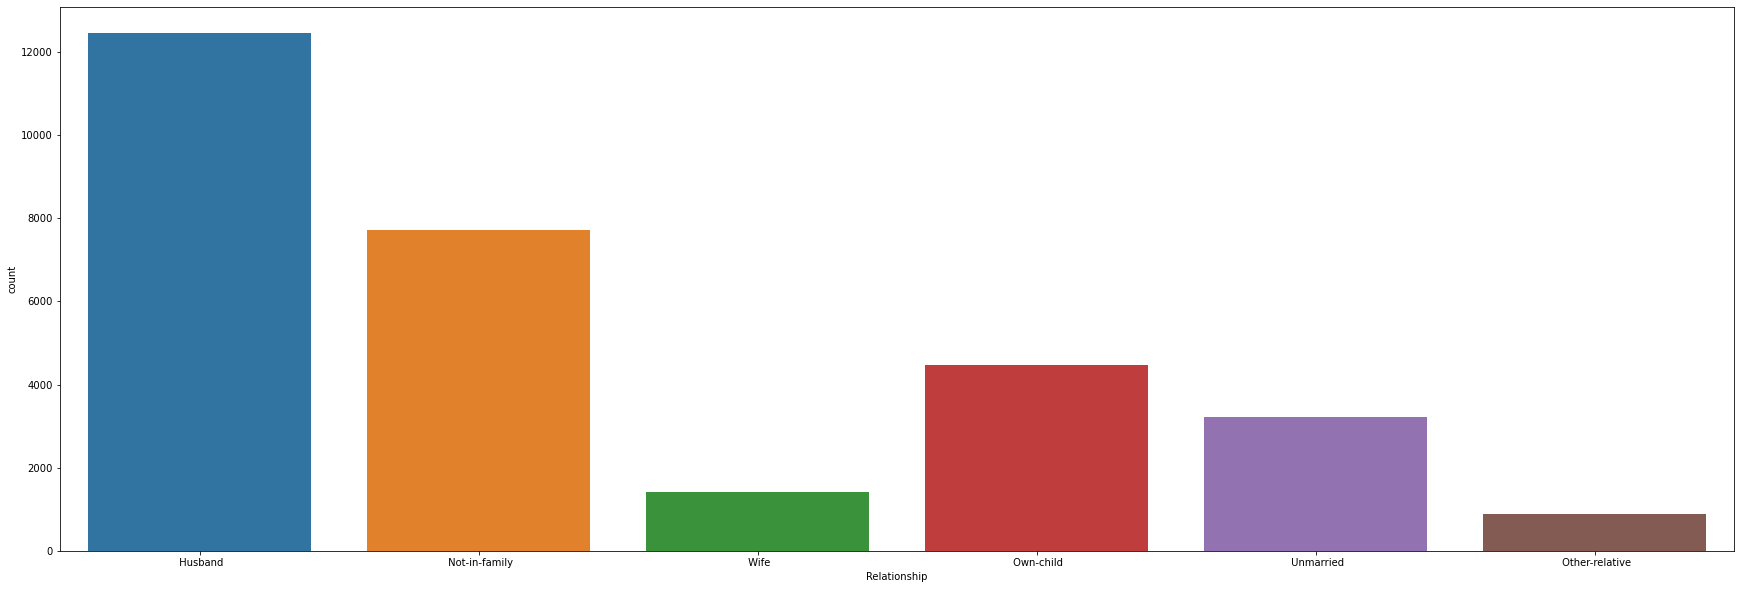

In [61]:
plt.figure(figsize=(30,10))
sns.countplot(census_data.Relationship);

# Race:

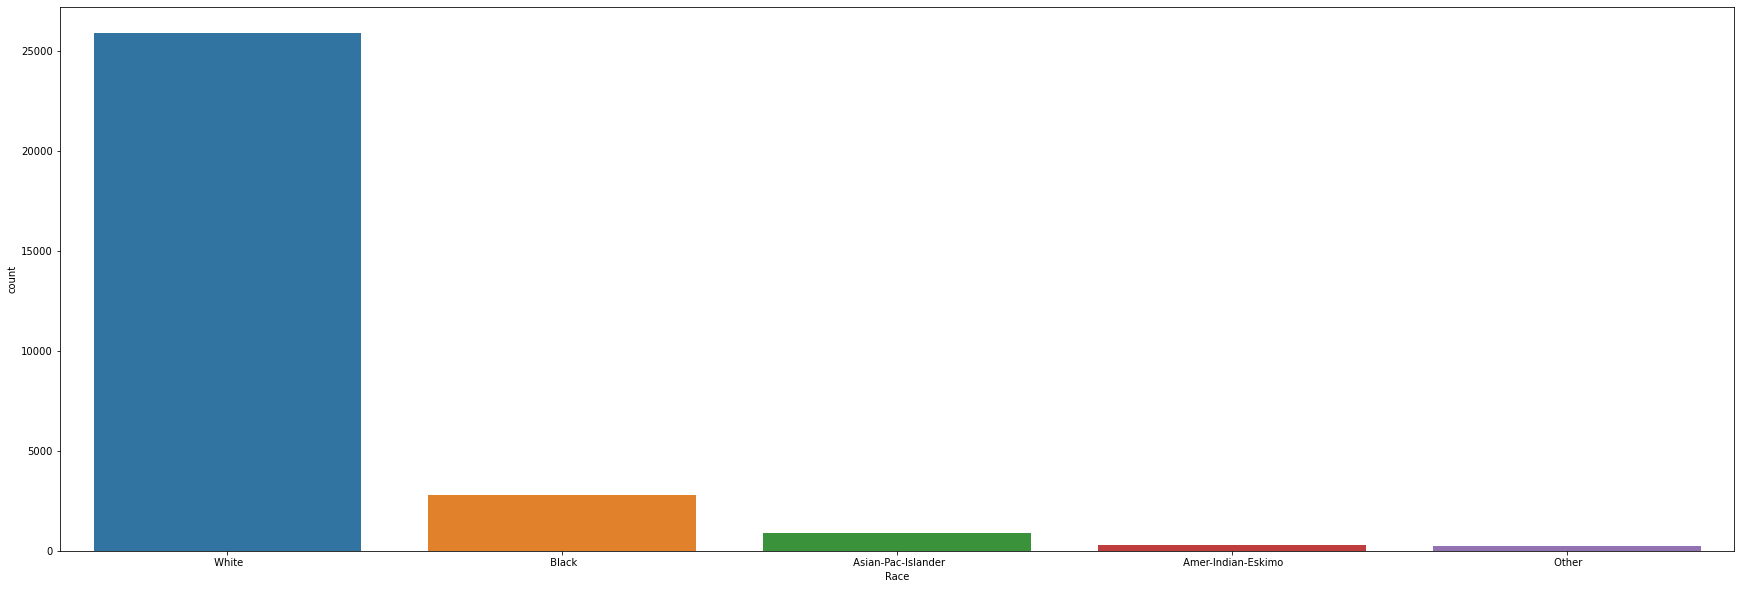

In [62]:
plt.figure(figsize=(30,10))
sns.countplot(census_data.Race);

In [63]:
# Observation: here we can see that the highest count is for the category "White" and the least count is for the category "Other".

# Sex:

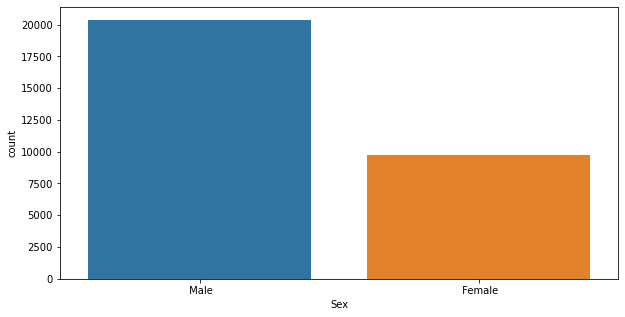

In [64]:
plt.figure(figsize=(10,5))
sns.countplot(census_data.Sex);

In [65]:
# Observation: Here we can see that highest count is for the category "Male".

# Capital_gain:

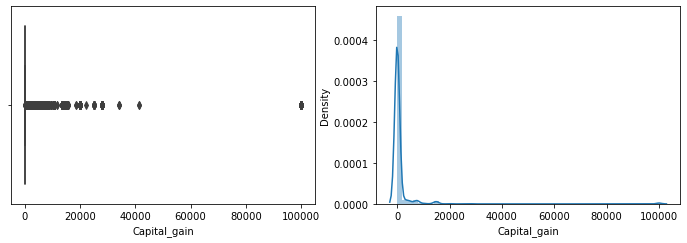

In [66]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.boxplot(census_data['Capital_gain']);
plt.subplot(2,2,2)
sns.distplot(census_data['Capital_gain']);

In [67]:
# Observation: Here we can see that boxplot has outliers and the distribution curve is not at all normal.

# Capital_loss:

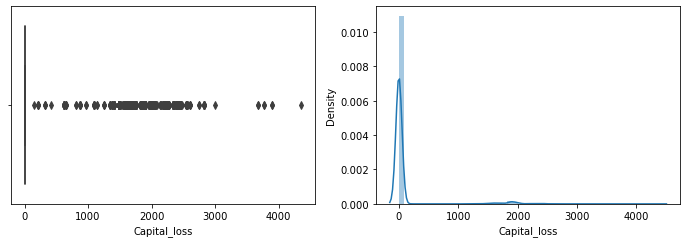

In [68]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.boxplot(census_data['Capital_loss']);
plt.subplot(2,2,2)
sns.distplot(census_data['Capital_loss']);

In [69]:
# Observation: Here we can see that the boxplot has many outliers and the distribution curve is not at all normal.

# Hours_per_week:

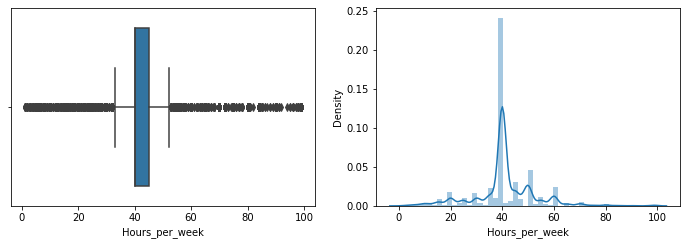

In [70]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.boxplot(census_data['Hours_per_week']);
plt.subplot(2,2,2)
sns.distplot(census_data['Hours_per_week']);

In [71]:
# Observation: Here we can see that there are many outliers on both sides of the quantiles and the distribution curve is not at all
# normal and has many peaks.

#  Native_country:

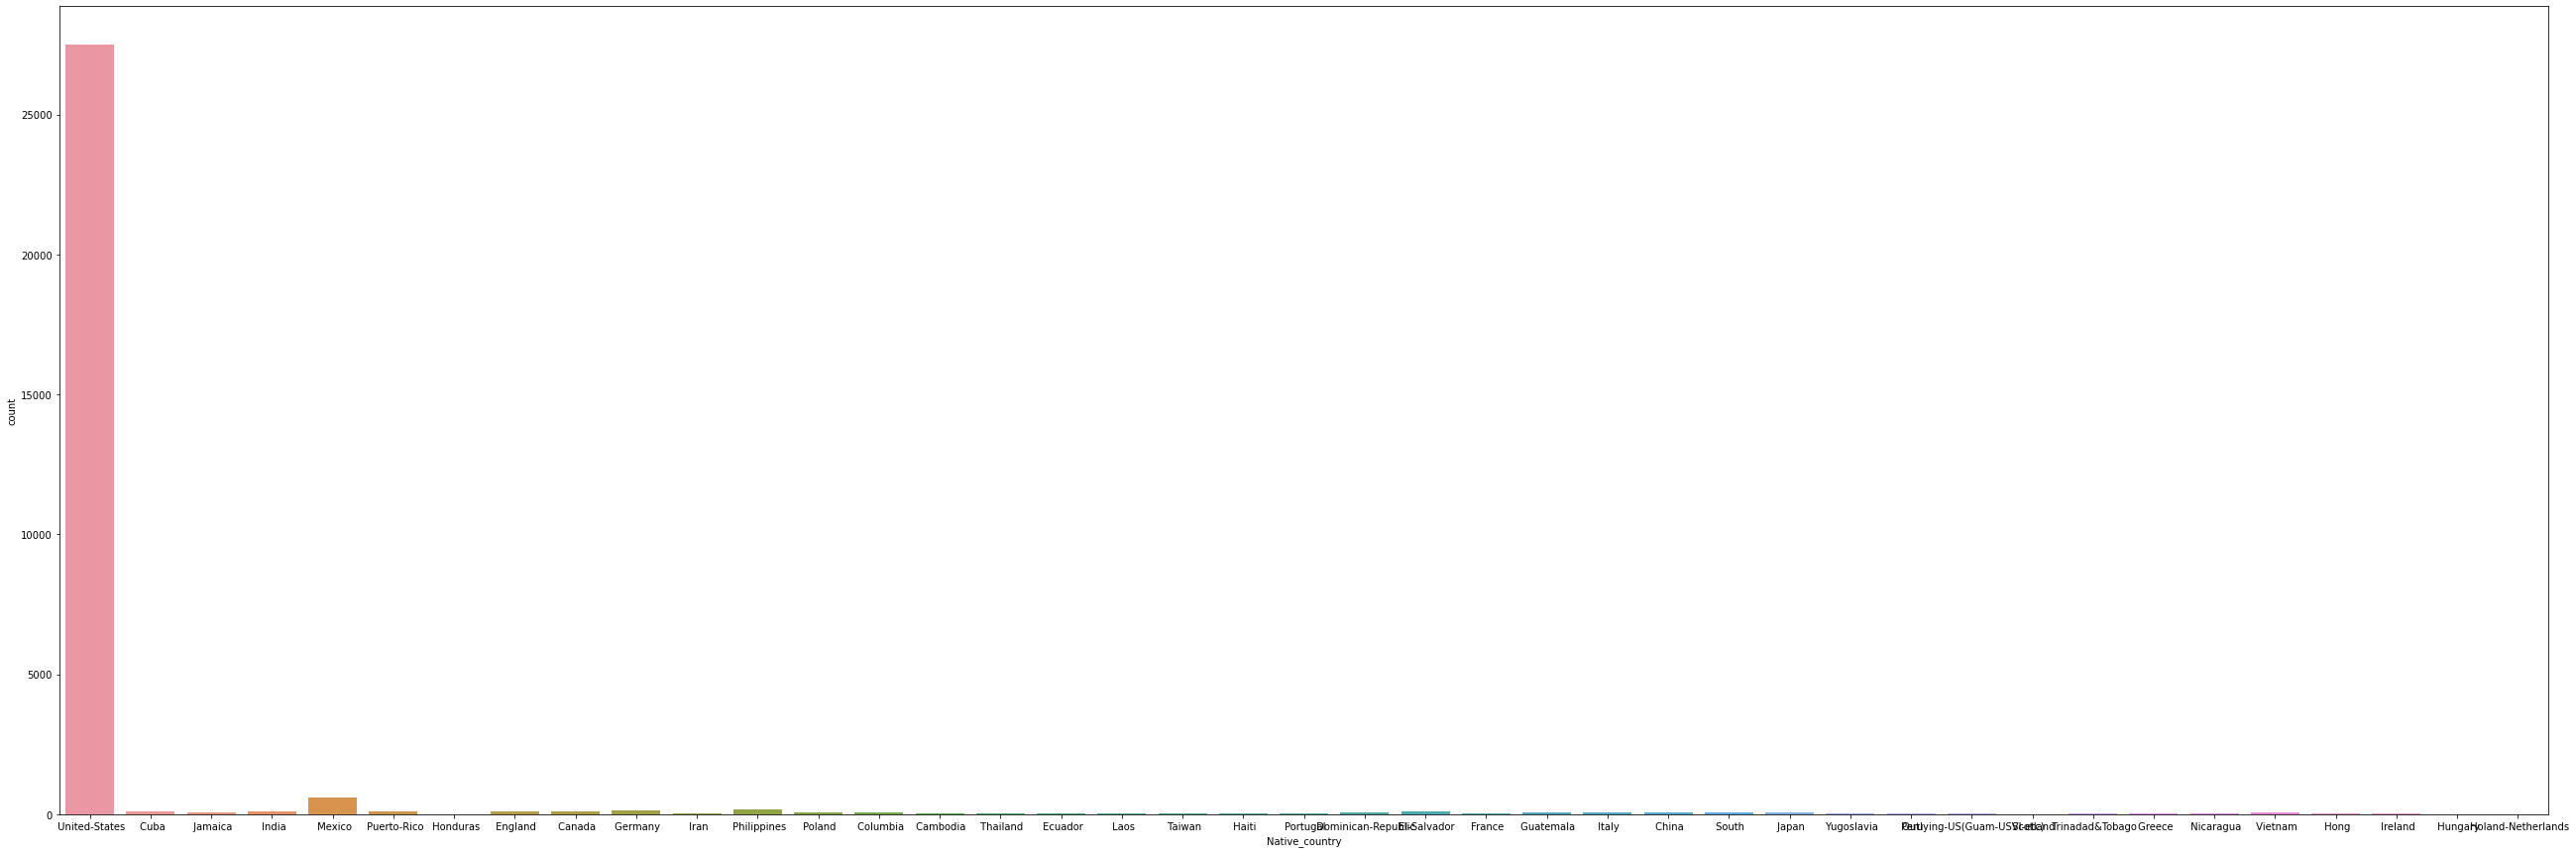

In [72]:
plt.figure(figsize=(45,15))
sns.countplot(census_data.Native_country);

In [73]:
# Observation: Here we can see that the highest count is only for "United states" and rest all the other are least in heir count.

# Income:

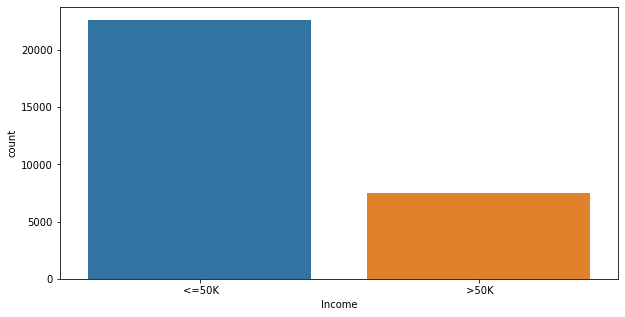

In [74]:
plt.figure(figsize=(10,5))
sns.countplot(census_data.Income);

In [75]:
# Observation: Here we can see that there are 2 categories which are <=50k and the other is >50k and this column is our label and
# by this we can understand that our model would be a "Classification model". 

# Bivariate Analysis:

In [76]:
census_data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

# Age:

<AxesSubplot:xlabel='Income', ylabel='Age'>

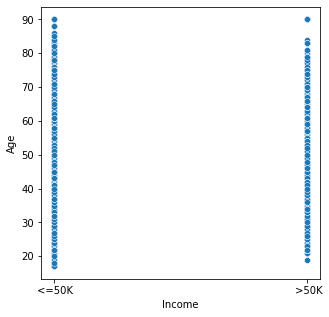

In [77]:
plot = plt.figure(figsize = (5,5))
sns.scatterplot(x = 'Income', y = 'Age', data = census_data )

In [1]:
# Observation: Here we can see that as the "age" increases there is increase in the "Income" and also we can see that there is 
# high density at the age 80-90 in the income <=50k and at which the income is less at that agein >50k.

# Workclass:

<AxesSubplot:xlabel='Income', ylabel='Workclass'>

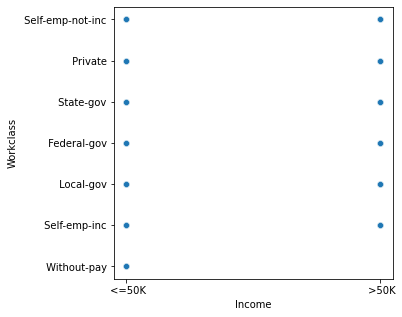

In [78]:
plot = plt.figure(figsize = (5,5))
sns.scatterplot(x = 'Income', y = 'Workclass', data = census_data )

In [2]:
# Observation: Here we can see that as there is change in "Workclass" categories there is change in the "income" in both of the
# categories <=50k and >50k and also it is understood that there is no income in the category "without pay" in the income >50k.

<AxesSubplot:xlabel='Income', ylabel='Fnlwgt'>

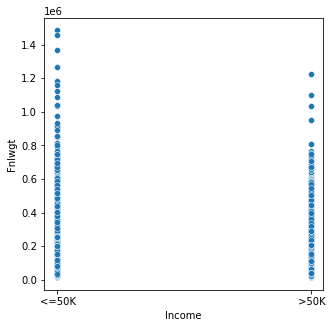

In [79]:
plot = plt.figure(figsize = (5,5))
sns.scatterplot(x = 'Income', y = 'Fnlwgt', data = census_data )

In [3]:
# Observation: Here we can see that as there is increase in the "fnlwgt"then there is increase in the category <=50k in income 
# but the category 50k has no density at the fnlwgt between 0.8 - 1.4 .

<AxesSubplot:xlabel='Income', ylabel='Education'>

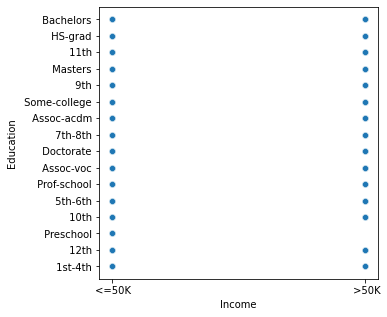

In [80]:
plot = plt.figure(figsize = (5,5))
sns.scatterplot(x = 'Income', y = 'Education', data = census_data )

In [4]:
# Observation: As the "Education" increases then we can see that there is change in different categories and "income" also changes
# and instead increases.

<AxesSubplot:xlabel='Income', ylabel='Education_num'>

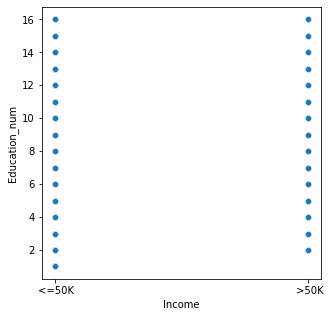

In [81]:
plot = plt.figure(figsize = (5,5))
sns.scatterplot(x = 'Income', y = 'Education_num', data = census_data )

In [5]:
# Observation: Here we can see that as there is change or increase in the category in "Educational_num" then there is individual
# difference in the <=50k,>50k.

In [82]:
census_data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

<AxesSubplot:xlabel='Income', ylabel='Marital_status'>

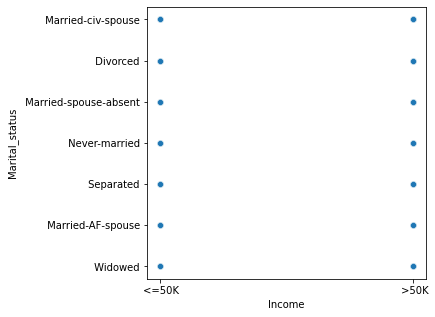

In [83]:
plot = plt.figure(figsize = (5,5))
sns.scatterplot(x = 'Income', y = 'Marital_status', data = census_data )

In [1]:
# Observation: Here we can see that the categories are with different distributions in the categories of the "Income".

<AxesSubplot:xlabel='Income', ylabel='Occupation'>

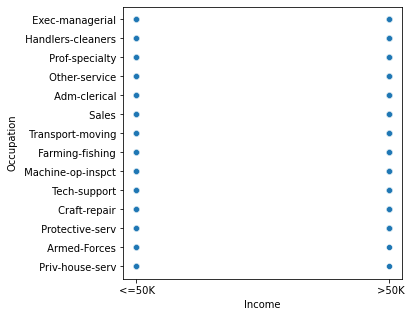

In [84]:
plot = plt.figure(figsize = (5,5))
sns.scatterplot(x = 'Income', y = 'Occupation', data = census_data )

In [2]:
# Observation: Here we can see that the different categories of the column "Occupation" are with almost same distributions in both
# the categories of the column "Income".

<AxesSubplot:xlabel='Income', ylabel='Relationship'>

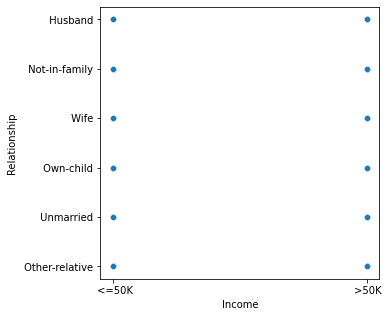

In [85]:
plot = plt.figure(figsize = (5,5))
sns.scatterplot(x = 'Income', y = 'Relationship', data = census_data )

In [3]:
# Observation: Here we can see that the different categories of the column "Relationship" are with almost same distributions in both
# the categories of the column "Income".

<AxesSubplot:xlabel='Income', ylabel='Race'>

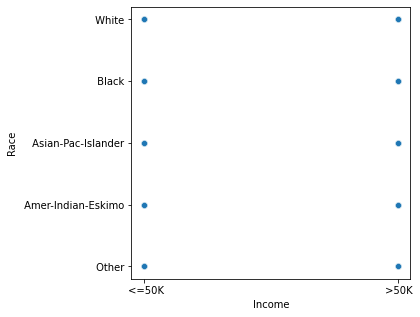

In [86]:
plot = plt.figure(figsize = (5,5))
sns.scatterplot(x = 'Income', y = 'Race', data = census_data )

In [4]:
# Observation: Here we can see that the different categories of the column "Race" are with almost same distributions in both
# the categories of the column "Income".

<AxesSubplot:xlabel='Income', ylabel='Sex'>

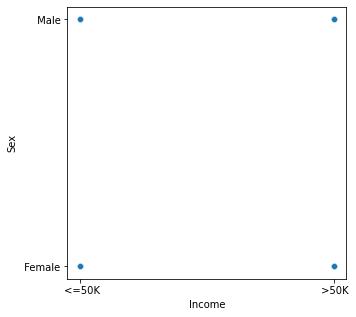

In [87]:
plot = plt.figure(figsize = (5,5))
sns.scatterplot(x = 'Income', y = 'Sex', data = census_data )

In [5]:
# Observation: Here we can see that there is no proper distribution in the categories of the column "Income" when with column "Sex".

<AxesSubplot:xlabel='Income', ylabel='Capital_gain'>

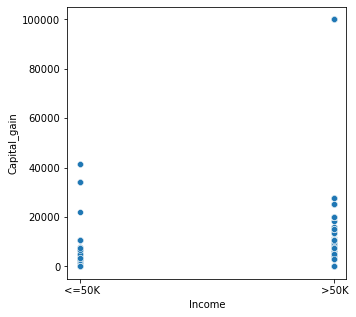

In [88]:
plot = plt.figure(figsize = (5,5))
sns.scatterplot(x = 'Income', y = 'Capital_gain', data = census_data )

In [9]:
# Observation: Here we can see that the density is in the lower side of the category >50k when compared to the category <=50k of the column "Income".

<AxesSubplot:xlabel='Income', ylabel='Capital_loss'>

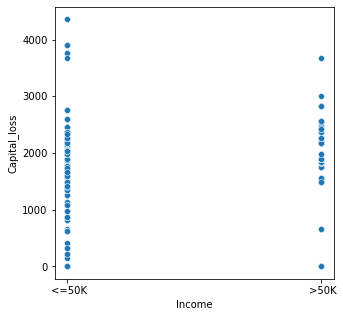

In [89]:
plot = plt.figure(figsize = (5,5))
sns.scatterplot(x = 'Income', y = 'Capital_loss', data = census_data )

In [8]:
# Observation: Here we can see that the highest distribution is in the category <=50k when compared to the category >50k of the column "Income".

<AxesSubplot:xlabel='Income', ylabel='Hours_per_week'>

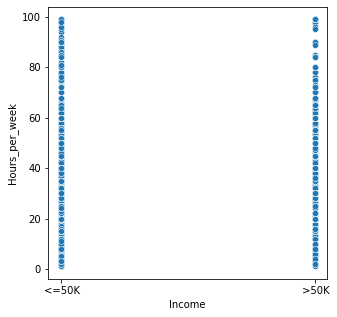

In [90]:
plot = plt.figure(figsize = (5,5))
sns.scatterplot(x = 'Income', y = 'Hours_per_week', data = census_data )

In [7]:
# Observation: Here we can see that the highest distribution is in the category <=50k when compared to the category >50k of the column "Income".

<AxesSubplot:xlabel='Income', ylabel='Native_country'>

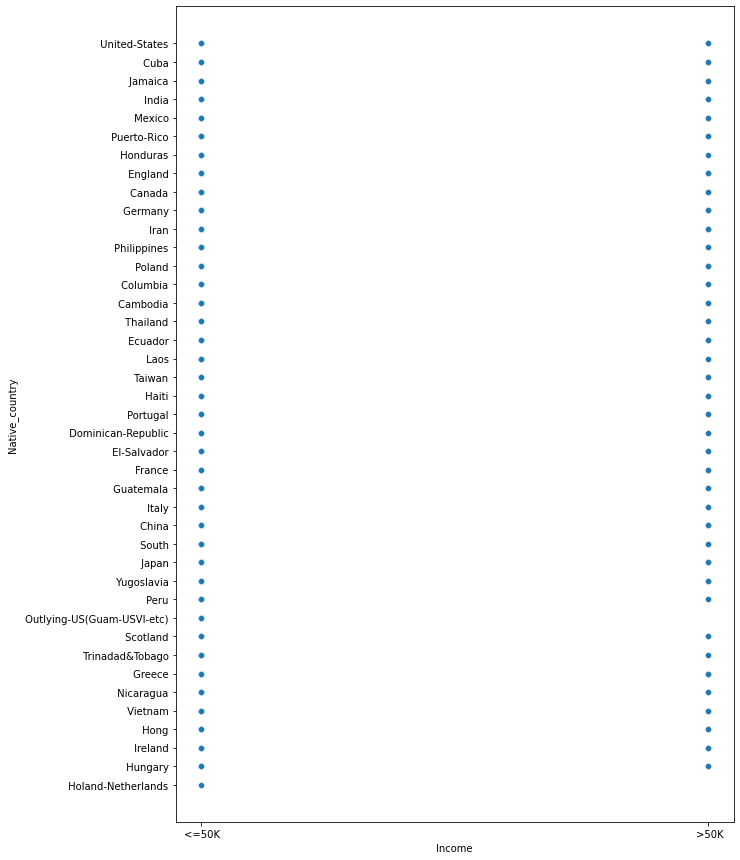

In [91]:
plot = plt.figure(figsize = (10,15))
sns.scatterplot(x = 'Income', y = 'Native_country', data = census_data )

In [6]:
# Observation: Here we can see that there are equal distributions in all the categories of both column.

# Multivariate Analysis:

## Correlation:

## Finding the correlation between the variables:

In [92]:
corr_data = census_data.corr()

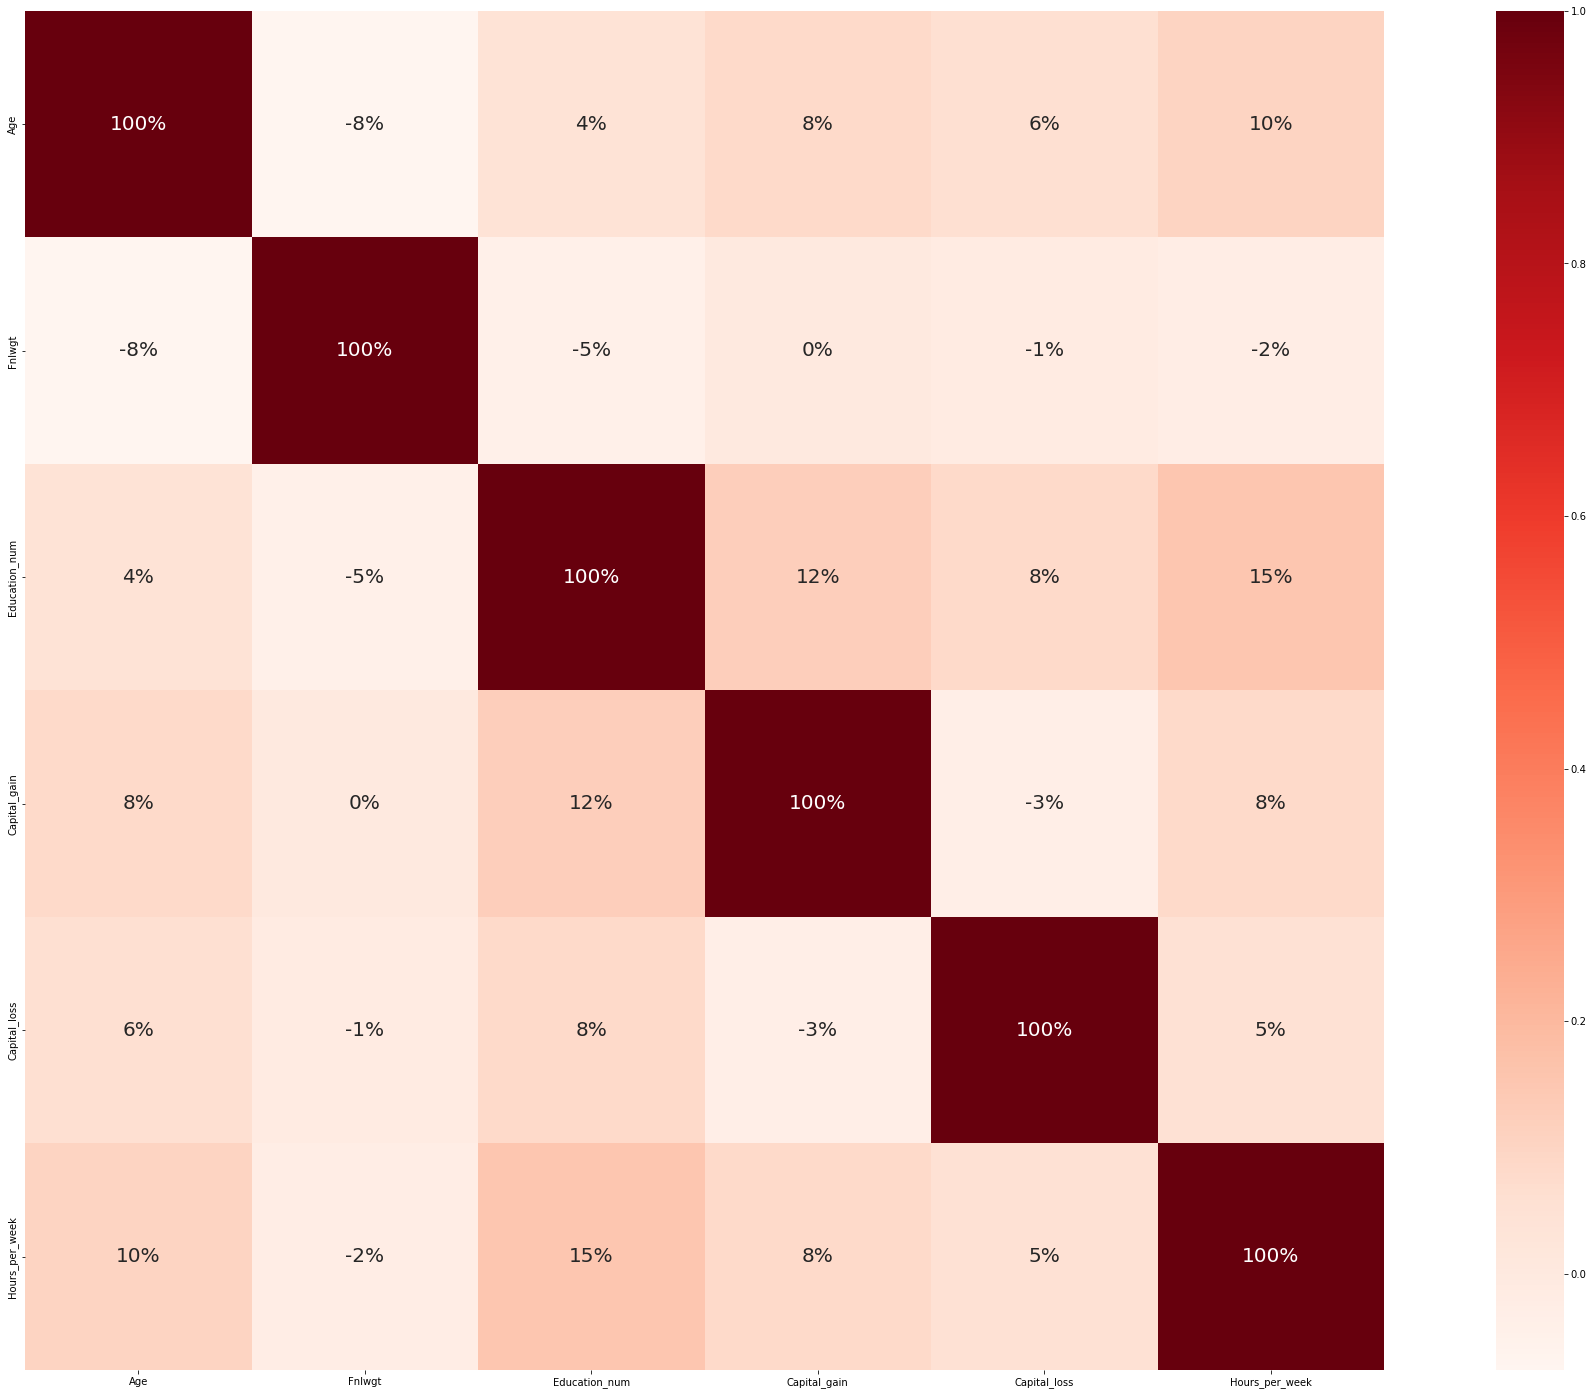

In [93]:
plt.figure(figsize =(40,25))
sns.heatmap(corr_data,annot = True,fmt = ".0%",cbar = True,square = True,annot_kws = {'size': 20}, cmap = 'Reds')
plt.show()

In [94]:
# Observation: Here we can see that all these columns are with very low correlation with label and also with eachother.

# Finding the value_counts in our label column:

In [95]:
Income_count = pd.DataFrame(census_data["Income"].value_counts())

In [96]:
Income_count

,Income
<=50K,22632
>50K,7506


# Transforming the data:

## Transforming the non-numerical columns into numerical:

In [97]:
from sklearn.preprocessing import LabelEncoder

In [98]:
# Inspite of mentioning each and every which has strings we user "forloop" here as the data seems to be big.

In [99]:
for column in census_data.columns:
    if census_data[column].dtype == np.number:
        continue
    census_data[column] = LabelEncoder().fit_transform(census_data[column])
        

In [100]:
census_data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,4,2726,9,12,2,3,0,4,1,0,0,12,38,0
1,21,2,13187,11,8,0,5,1,4,1,0,0,39,38,0
2,36,2,14353,1,6,2,5,0,2,1,0,0,39,38,0
3,11,2,18119,9,12,2,9,5,2,0,0,0,39,4,0
4,20,2,16566,12,13,2,3,5,4,0,0,0,39,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,10,2,15470,7,11,2,12,5,4,0,0,0,37,38,0
32556,23,2,7554,11,8,2,6,0,4,1,0,0,39,38,1
32557,41,2,7376,11,8,6,0,4,4,0,0,0,39,38,0
32558,5,2,12059,11,8,4,0,3,4,1,0,0,19,38,0


# Checking the Outliers:

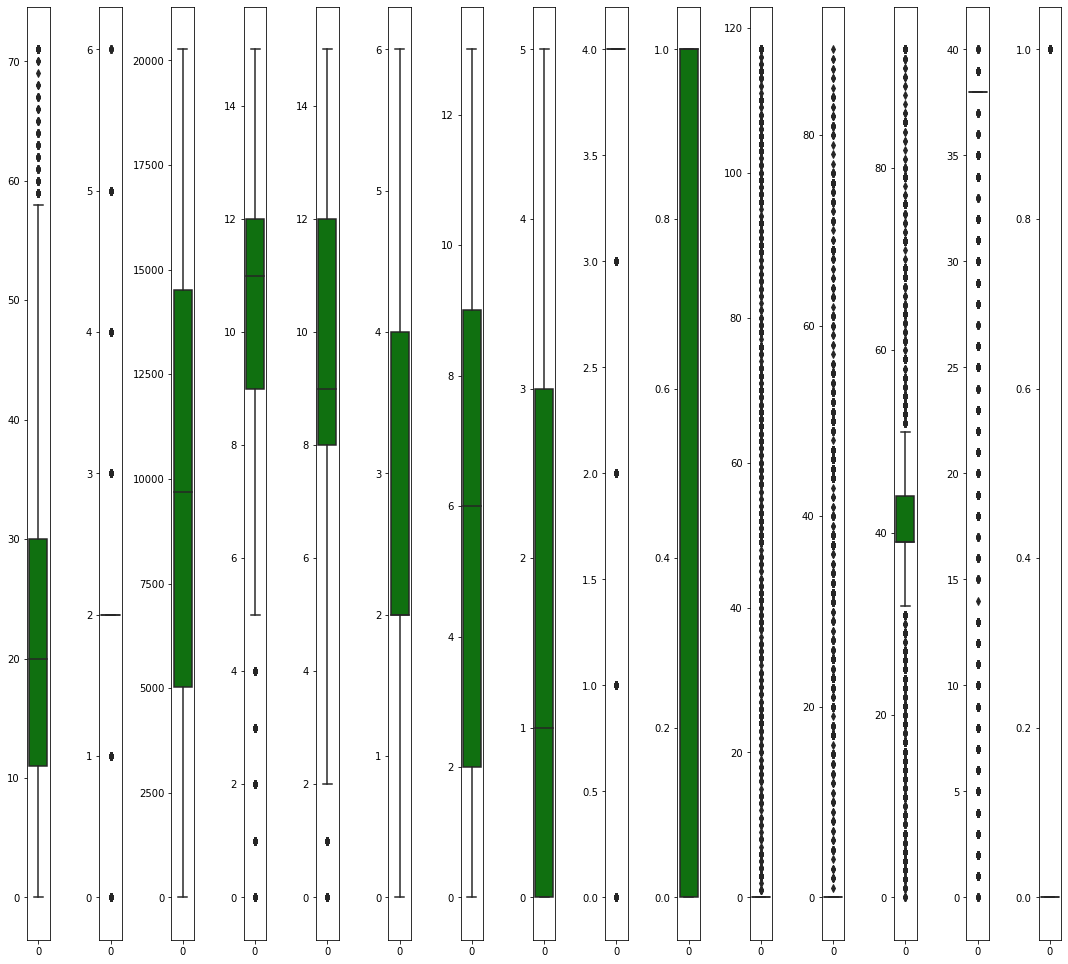

In [101]:
col_list = census_data.columns.values
ncol = 32
nrows = 12
plt.figure(figsize = (ncol,5*ncol))
for i in range (0, len(col_list)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data = census_data[col_list[i]],color = 'green', orient = 'v')
    plt.tight_layout()

In [102]:
# Observation: Here we can see that there are few columns with many number of outliers and mostly the columns "Native_country",
# "Hours_per_week", "Capital_loss", "Capital_gain" are with many number of outliers and of them the column "Hours_per_week" has
# outliers on both sides.

# Treating/Removing the outliers:

In [103]:
from scipy.stats import zscore
z = np.abs(zscore(census_data))
z.shape

(30138, 15)

In [104]:
threshold = 3
print(np.where(z>3))

(array([    3,     7,     8, ..., 30128, 30130, 30137], dtype=int64), array([13, 10, 10, ...,  8,  8, 10], dtype=int64))


In [105]:
census_data_new = census_data[(z<3).all(axis = 1)]
print(census_data.shape)
print(census_data_new.shape)

(30138, 15)
(25095, 15)


In [106]:
# Observation: Here we can see that the number of records reduced which indicates that we have succeeded in the reduction of the
# outliers and thus we can proceed with our model.

# loss percentage calculation:

In [107]:
loss_percent = (30138-25095)/30138*100
print(loss_percent)

16.733028070873978


# Checking the Skewness:

In [108]:
census_data_new.skew()

Age               0.470686
Workclass         1.209196
Fnlwgt            0.043663
Education        -0.964003
Education_num    -0.140265
Marital_status   -0.077640
Occupation        0.126800
Relationship      0.751909
Race             -2.574446
Sex              -0.688212
Capital_gain      5.829795
Capital_loss      9.788317
Hours_per_week   -0.284461
Native_country   -5.212713
Income            1.520476
dtype: float64

In [109]:
# Observation: Here we can see that the there are columns with extreme skewness either it is negative skewness or positive skewness
# and alowest skewness is for the column "Native_country" and the highest is for the column "Capital_loss".

# Removing the skewness:

In [110]:
features = ["Native_country","Capital_loss","Capital_gain","Workclass","Race"]

In [111]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [112]:
census_data_new[features] = scaler.fit_transform(census_data_new[features].values)
census_data_new[features]

,Native_country,Capital_loss,Capital_gain,Workclass,Race
0,0.165979,-0.115789,-0.196724,1.799395,0.348802
1,0.165979,-0.115789,-0.196724,-0.118525,0.348802
2,0.165979,-0.115789,-0.196724,-0.118525,-2.870006
4,0.165979,-0.115789,-0.196724,-0.118525,0.348802
5,-4.325867,-0.115789,-0.196724,-0.118525,-2.870006
...,...,...,...,...,...
32554,0.165979,-0.115789,-0.196724,-0.118525,0.348802
32555,0.165979,-0.115789,-0.196724,-0.118525,0.348802
32556,0.165979,-0.115789,-0.196724,-0.118525,0.348802
32557,0.165979,-0.115789,-0.196724,-0.118525,0.348802


In [113]:
census_data_new.skew()

Age               0.470686
Workclass         0.123680
Fnlwgt            0.043663
Education        -0.964003
Education_num    -0.140265
Marital_status   -0.077640
Occupation        0.126800
Relationship      0.751909
Race             -2.518358
Sex              -0.688212
Capital_gain      4.886834
Capital_loss      8.521117
Hours_per_week   -0.284461
Native_country    1.404296
Income            1.520476
dtype: float64

In [114]:
# Observation: Here we can see that there is change or we can say that reduce in the skewness of the data.

# Data Preprocessing:

## Separating independent and the target variables:

### train_test_split:

In [115]:
x = census_data_new.drop("Income", axis=1)
y = census_data_new["Income"]

In [116]:
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,33,1.799395,2726,9,12,2,3,0,0.348802,1,-0.196724,-0.115789,12,0.165979
1,21,-0.118525,13187,11,8,0,5,1,0.348802,1,-0.196724,-0.115789,39,0.165979
2,36,-0.118525,14353,1,6,2,5,0,-2.870006,1,-0.196724,-0.115789,39,0.165979
4,20,-0.118525,16566,12,13,2,3,5,0.348802,0,-0.196724,-0.115789,39,0.165979
5,32,-0.118525,7981,6,4,3,7,1,-2.870006,0,-0.196724,-0.115789,15,-4.325867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,5,-0.118525,17374,15,9,4,10,1,0.348802,1,-0.196724,-0.115789,39,0.165979
32555,10,-0.118525,15470,7,11,2,12,5,0.348802,0,-0.196724,-0.115789,37,0.165979
32556,23,-0.118525,7554,11,8,2,6,0,0.348802,1,-0.196724,-0.115789,39,0.165979
32557,41,-0.118525,7376,11,8,6,0,4,0.348802,0,-0.196724,-0.115789,39,0.165979


In [117]:
y

0        0
1        0
2        0
4        0
5        0
        ..
32554    0
32555    0
32556    1
32557    0
32558    0
Name: Income, Length: 25095, dtype: int32

# Scaling the x_data using standardscaler:

In [118]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.961058,1.799395,-1.267433,-0.350314,1.254196,-0.394840,-0.718858,-0.920370,0.348802,0.713456,-0.196724,-0.115789,-2.546462,0.165979
1,0.026590,-0.118525,0.579736,0.168459,-0.432132,-1.703931,-0.225902,-0.292657,0.348802,0.713456,-0.196724,-0.115789,-0.022599,0.165979
2,1.194675,-0.118525,0.785624,-2.425408,-1.275296,-0.394840,-0.225902,-0.920370,-2.870006,0.713456,-0.196724,-0.115789,-0.022599,0.165979
3,-0.051282,-0.118525,1.176388,0.427846,1.675778,-0.394840,-0.718858,2.218194,0.348802,-1.401628,-0.196724,-0.115789,-0.022599,0.165979
4,0.883186,-0.118525,-0.339523,-1.128474,-2.118460,0.259706,0.267055,-0.292657,-2.870006,-1.401628,-0.196724,-0.115789,-2.266033,-4.325867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25090,-1.219367,-0.118525,1.319062,1.206006,-0.010550,0.914251,1.006490,-0.292657,0.348802,0.713456,-0.196724,-0.115789,-0.022599,0.165979
25091,-0.830005,-0.118525,0.982860,-0.869088,0.832614,-0.394840,1.499446,2.218194,0.348802,-1.401628,-0.196724,-0.115789,-0.209552,0.165979
25092,0.182335,-0.118525,-0.414921,0.168459,-0.432132,-0.394840,0.020577,-0.920370,0.348802,0.713456,-0.196724,-0.115789,-0.022599,0.165979
25093,1.584037,-0.118525,-0.446351,0.168459,-0.432132,2.223342,-1.458293,1.590481,0.348802,-1.401628,-0.196724,-0.115789,-0.022599,0.165979


In [119]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

# Training:

In [120]:
models = {"LogisticRegression" : LogisticRegression(),
          "K-Nearest Neighbors": KNeighborsClassifier(),
          "Decision Tree"      : DecisionTreeClassifier(),
          "Random Forest"      : RandomForestClassifier(),
          "Gradient Boosting"  : GradientBoostingClassifier()}

for name, model in models.items():
    model.fit(x_train,y_train)
    print(name + " is trained now.")

LogisticRegression is trained now.
K-Nearest Neighbors is trained now.
Decision Tree is trained now.
Random Forest is trained now.
Gradient Boosting is trained now.


# Testing:

In [121]:
for name, model in models.items():
    print(name + ": {:,.2f}%".format(model.score(x_test,y_test)*100))

LogisticRegression: 82.30%
K-Nearest Neighbors: 82.51%
Decision Tree: 79.51%
Random Forest: 83.96%
Gradient Boosting: 84.37%


# Hyper Parameter Tuning:

# Grid Search CV:

In [122]:
from sklearn.model_selection import GridSearchCV

In [123]:
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,20],
             'max_depth':[2,4,6]}

# Gradient Boosting Classifier:

In [124]:
# here we use "GradientBoostingClassifier" because this model has highest accuracy score when compared to the other models.

In [125]:
GCV=GridSearchCV(GradientBoostingClassifier(),parameters,cv=5)

In [126]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [127]:
parameters = {'criterion': ['mse','mae'], 'max_features': ['auto', 'sqrt', 'log2']}

GradientBoosting = GradientBoostingClassifier()
Classifier = GridSearchCV(GradientBoosting,parameters)
Classifier.fit(x_train,y_train)

print(Classifier.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [128]:
# observation: here we can see that the best_parameteers are selected.

In [129]:
GradientBoosting = GradientBoostingClassifier(criterion = 'mse', max_features = 'auto')
GradientBoosting.fit(x_train,y_train)
GradientBoosting.score(x_train,y_train)

pred_decision = GradientBoosting.predict(x_test)
GradientBoostingS = r2_score(y_test,pred_decision)
print('R2 Score:', GradientBoostingS*100)

GradientBoostingScore = cross_val_score(GradientBoosting,x,y,cv = 5)
GradientBoostingC = GradientBoostingScore.mean()
print("Cross Val Score:",GradientBoostingC*100)

R2 Score: 0.710773136793319
Cross Val Score: 85.21219366407651


# Saving the model:

In [130]:
import pickle
filename = 'churn.pkl'
pickle.dump(GradientBoosting,open(filename, 'wb'))

In [131]:
loaded_model = pickle.load(open("churn.pkl", "rb"))
result = loaded_model.score(x_test, y_test)
print(result)

0.8436711382653739


# Conclusion:

In [132]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index = ["Predicted","Original"])

In [133]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,7519,7520,7521,7522,7523,7524,7525,7526,7527,7528
Predicted,0,0,0,0,0,0,0,1,1,1,...,0,0,1,0,0,0,0,0,0,0
Original,0,0,0,0,0,0,0,1,1,1,...,0,0,1,0,0,0,0,0,0,0


So, therefore our best model is "GradientBoosting" and the percentage we achieved is 84% .